In [1]:
import sys
sys.path.insert(0, '../scripts')

import pandas as pd
import direction_transition as dit
import paths
from preprocessing import read_csv_clean

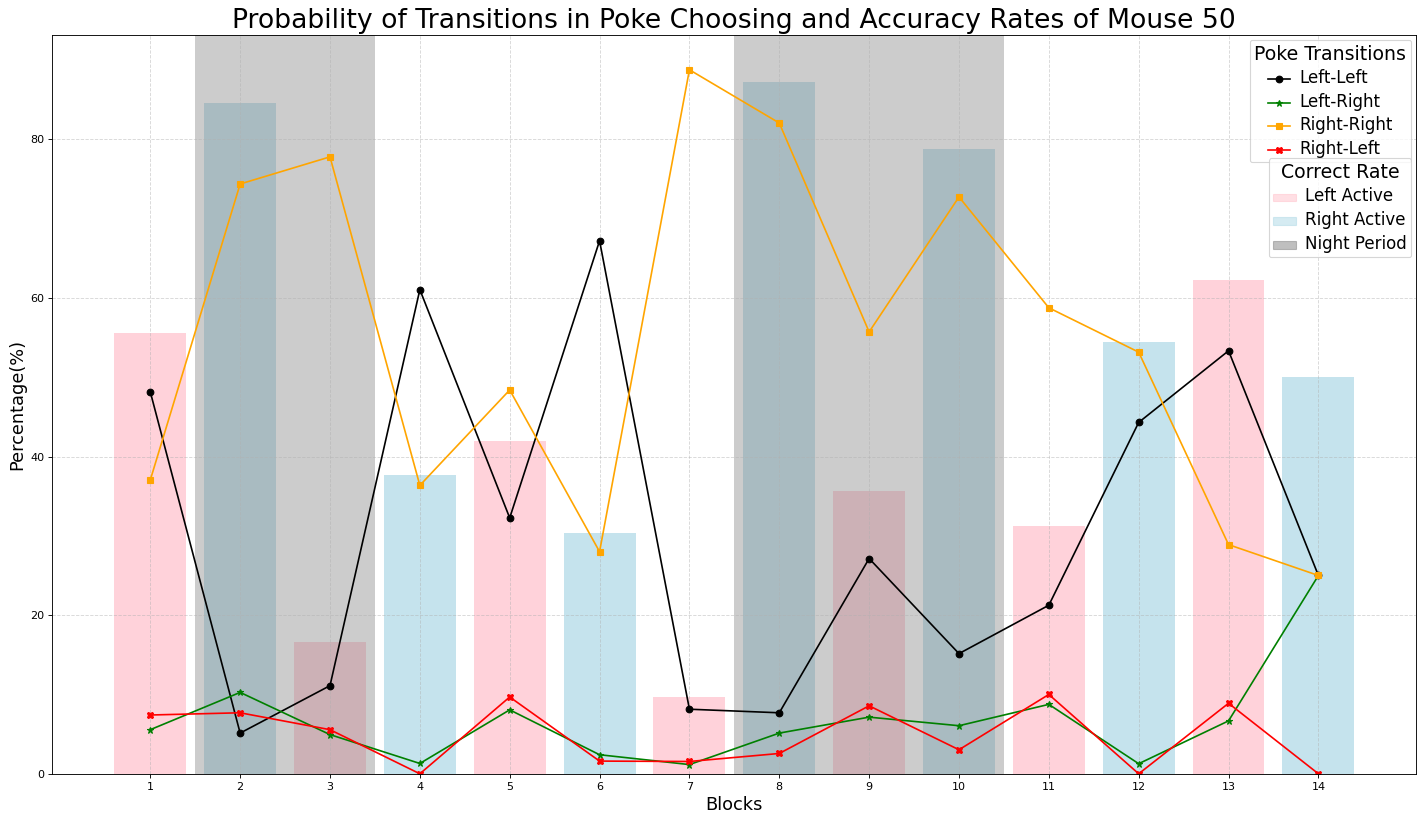

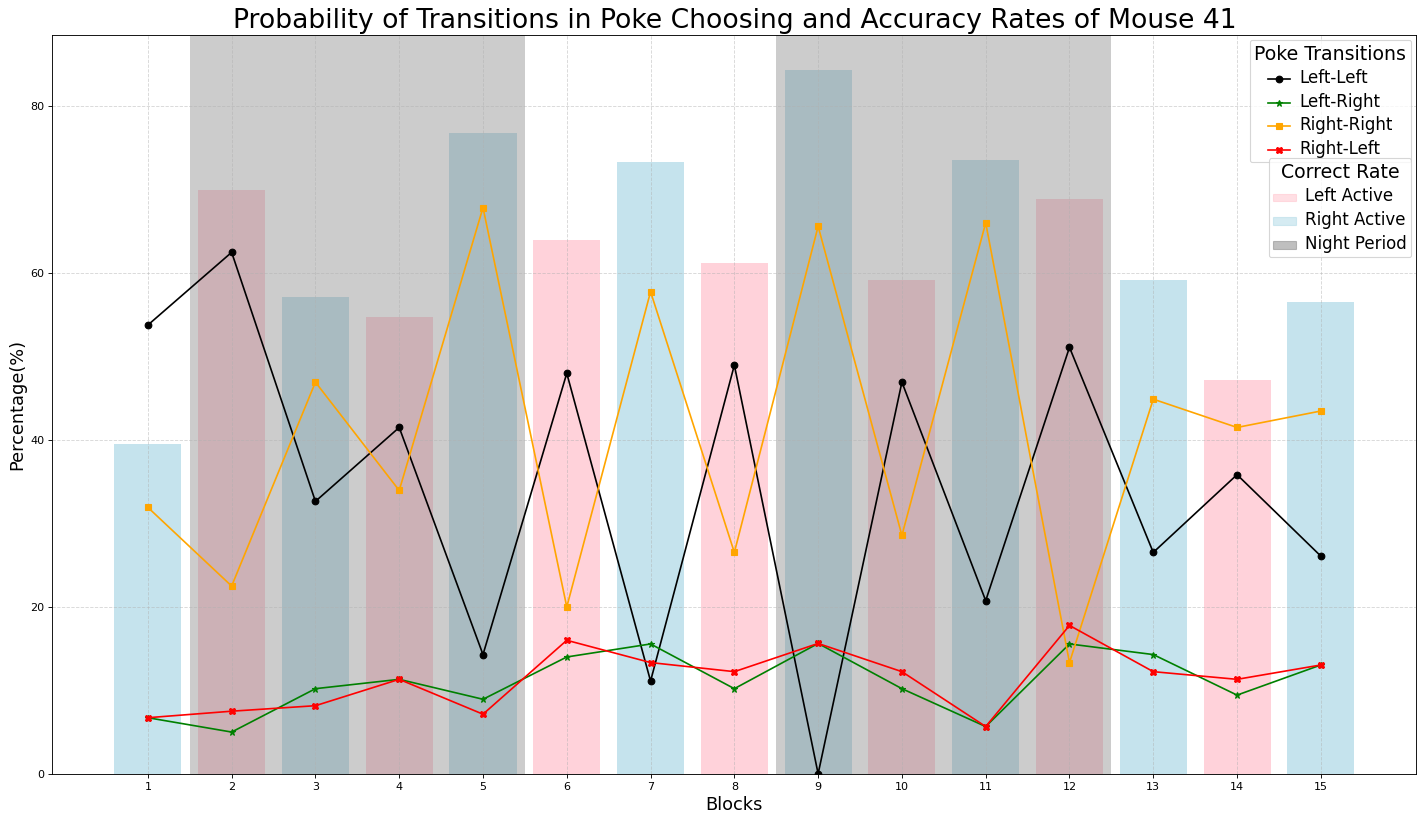

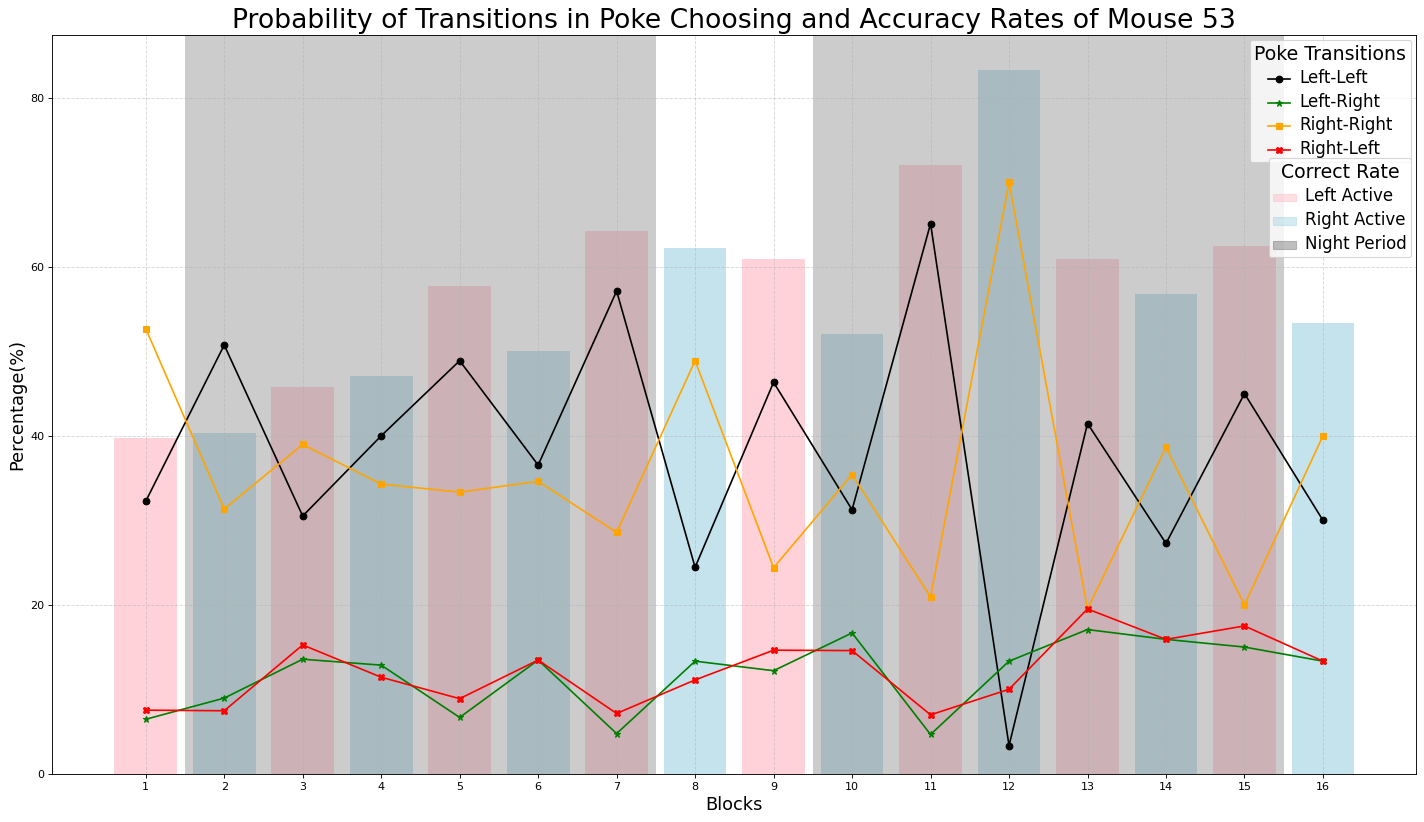

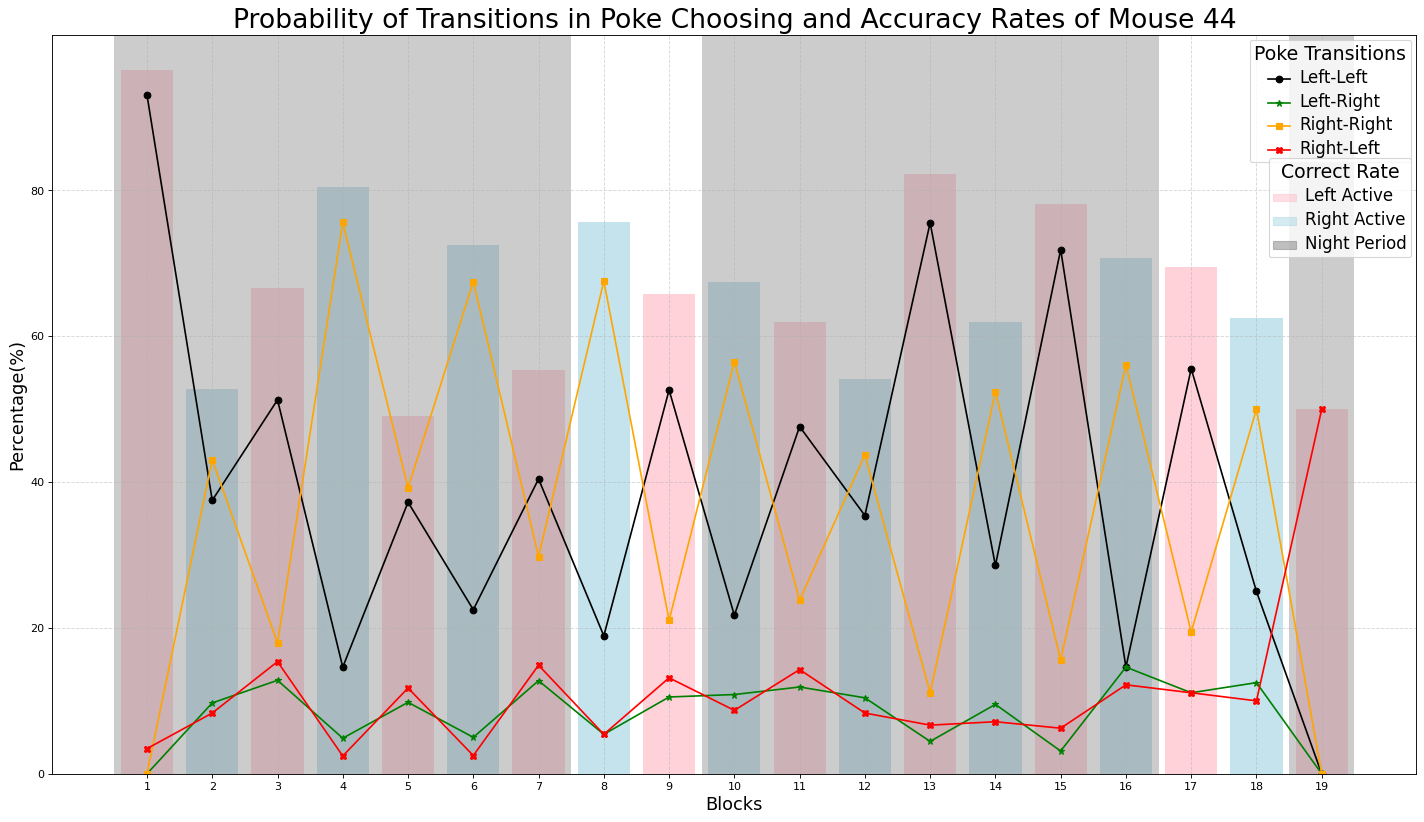

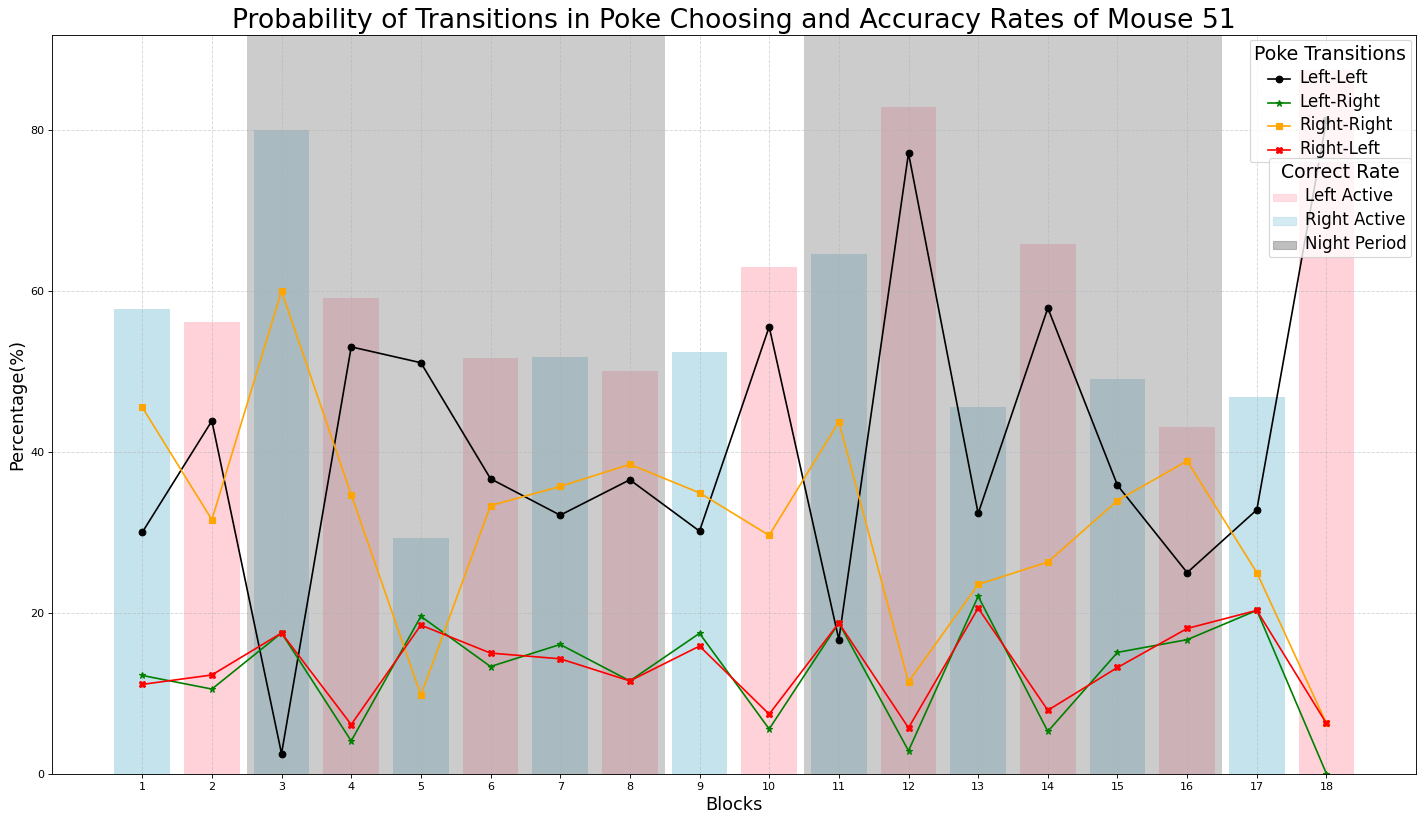

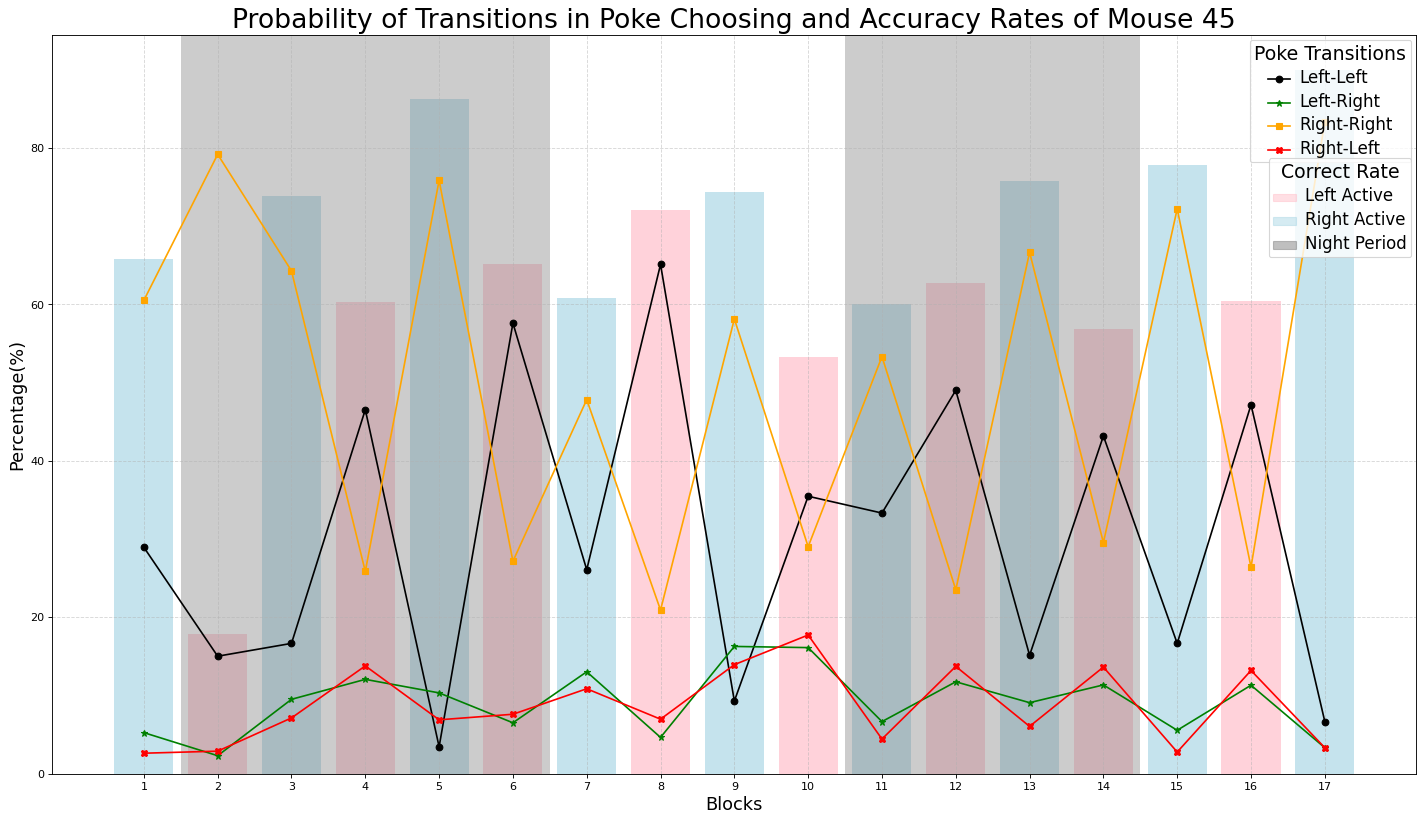

In [2]:
ctrl_scores = []
for path in paths.reversal_ivsa_ctrl:
        data_dropped = read_csv_clean(path, remove_trivial=False)
        blocks = dit.split_data_to_blocks(data_dropped)
        data_stats = dit.get_transition_info(blocks)
        dit.graph_tranition_stats(data_stats, blocks, path)
        acc, grad = dit.block_cumulative_acc(blocks, normalize=True, grad=True)
        ctrl_scores.append(sum(grad))

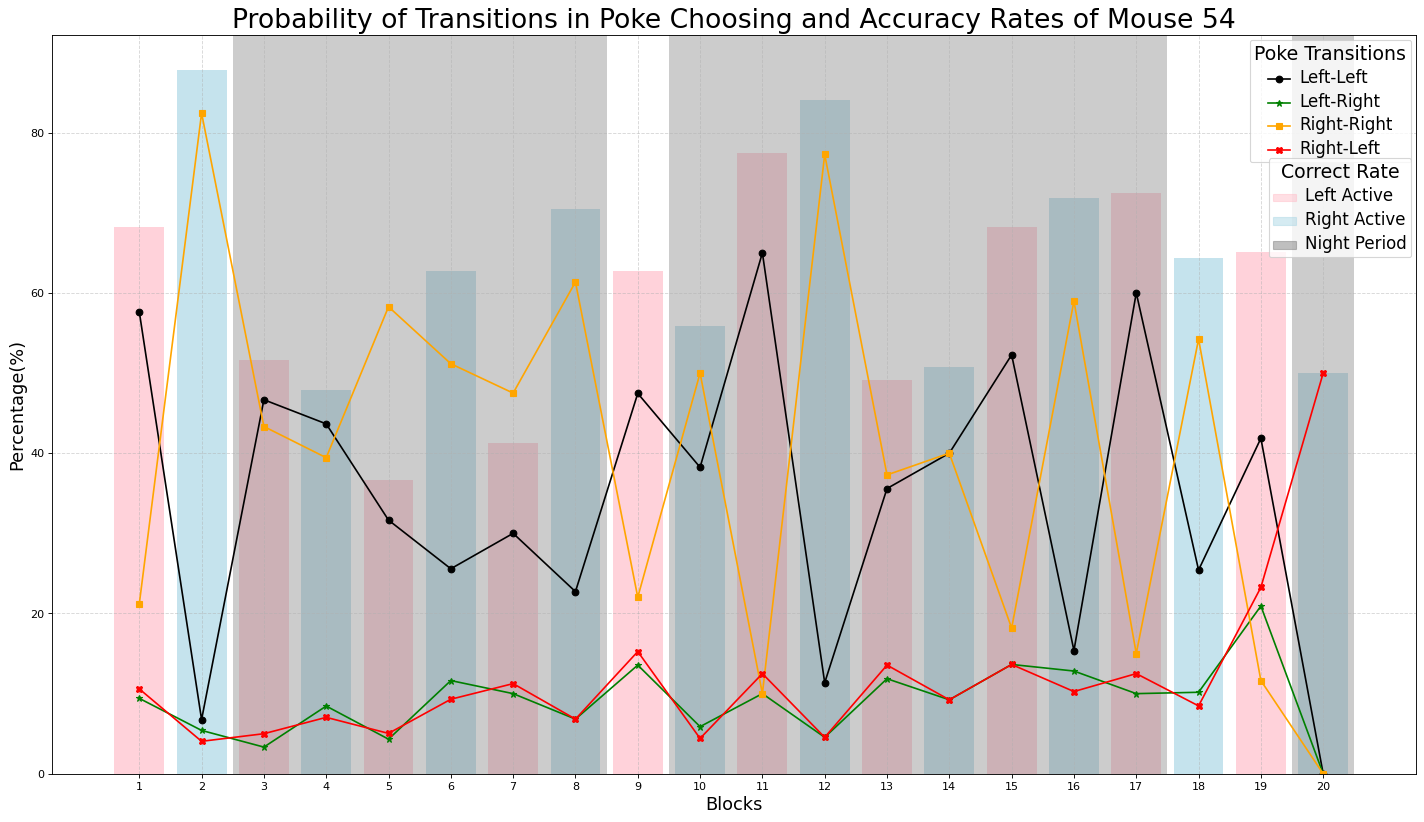

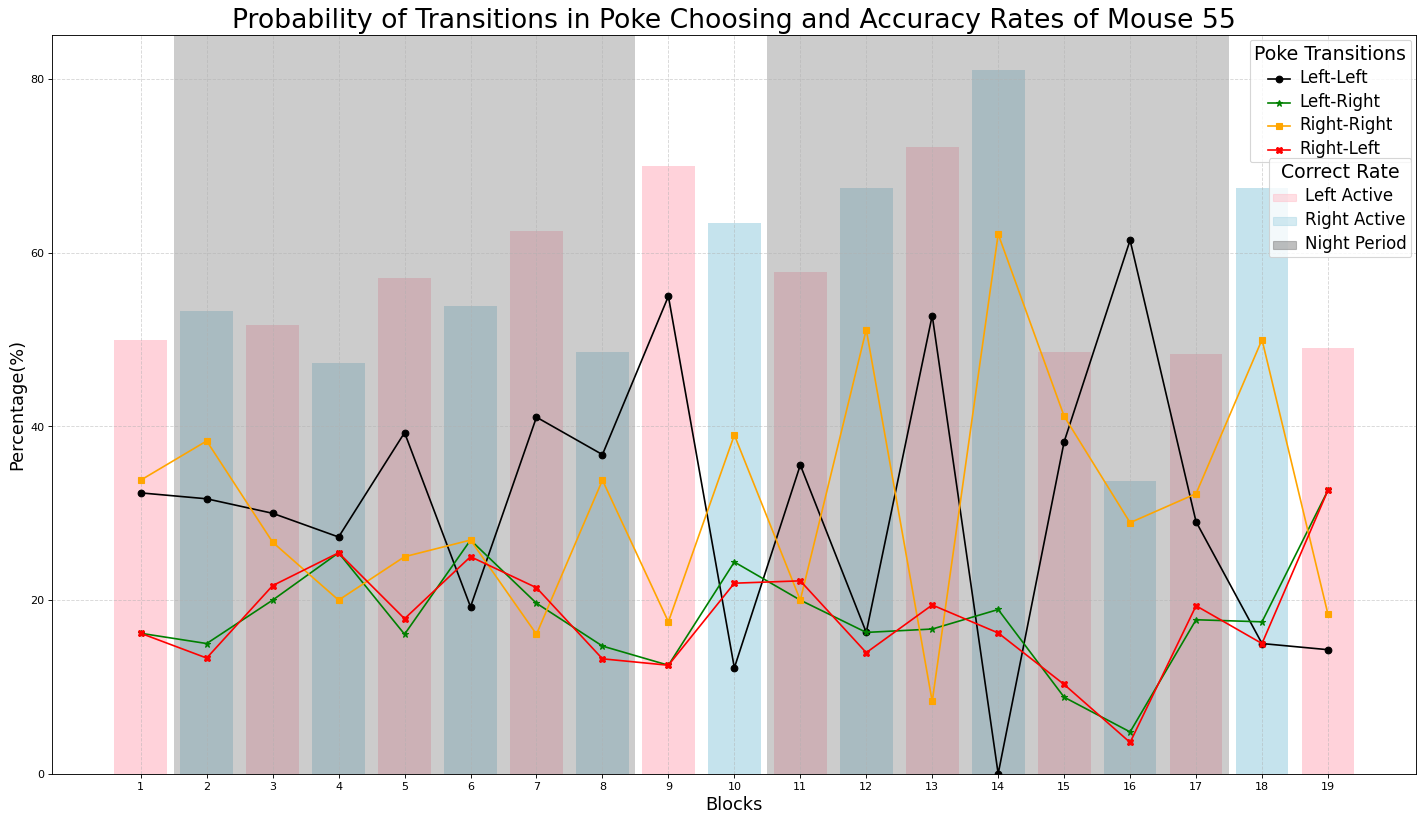

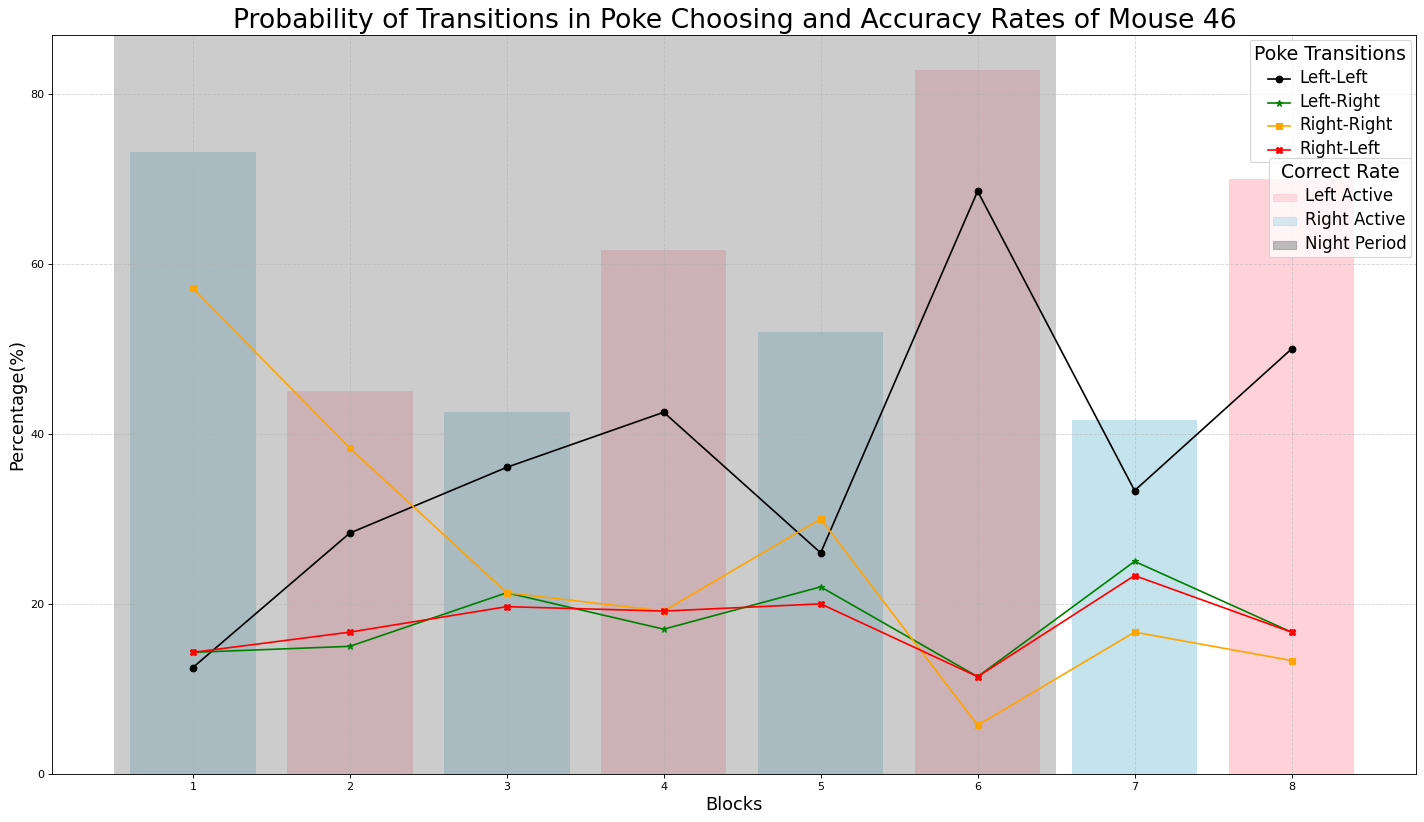

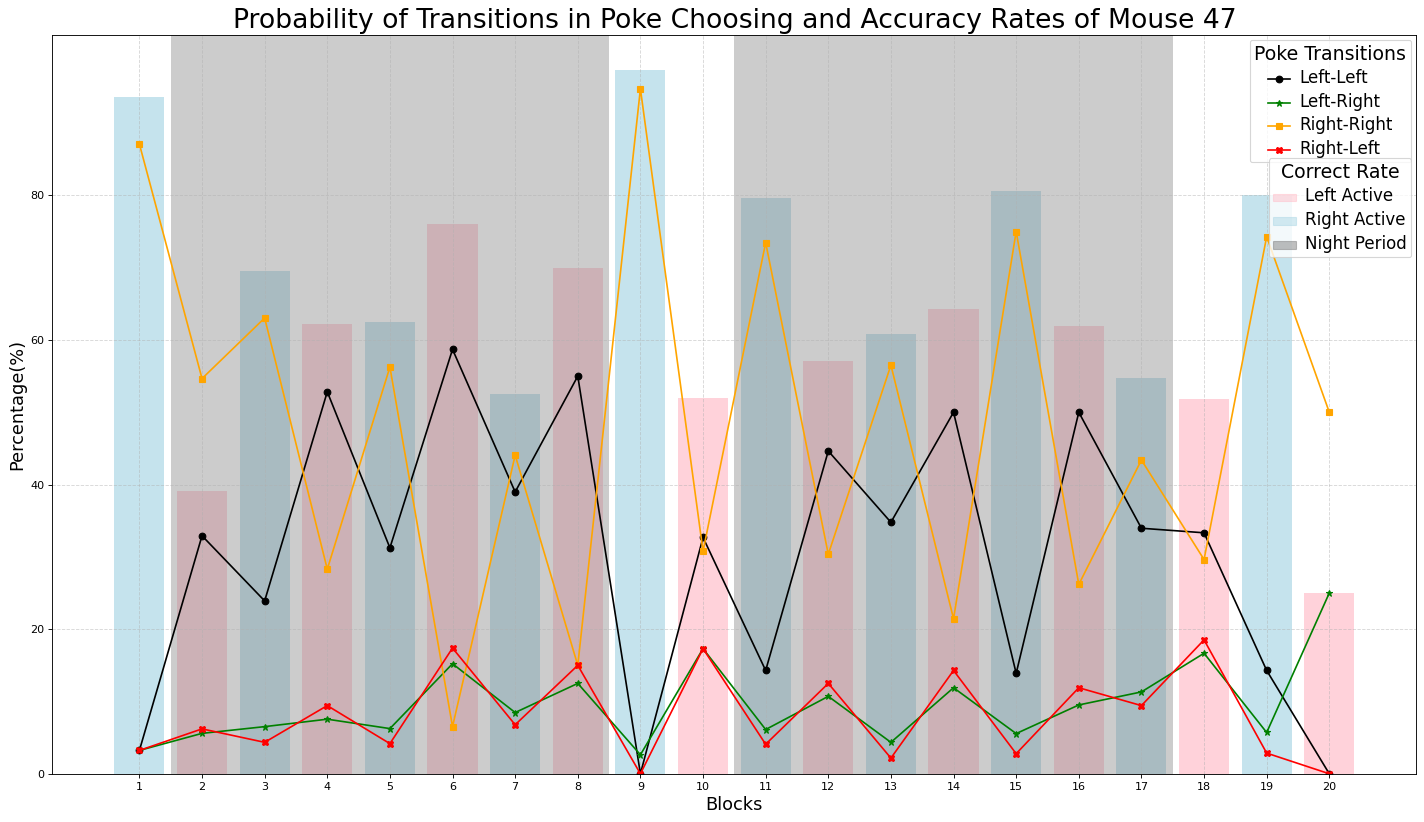

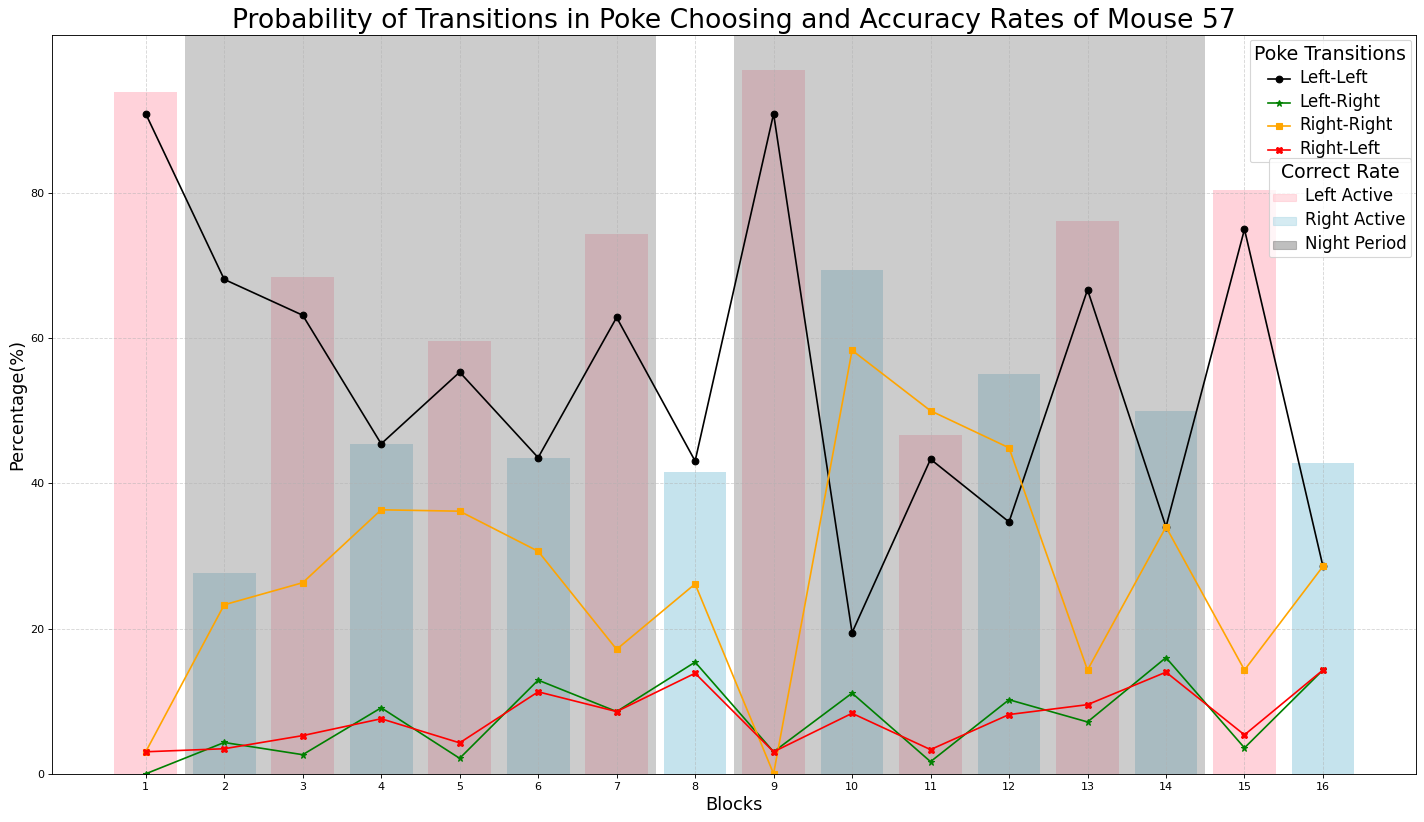

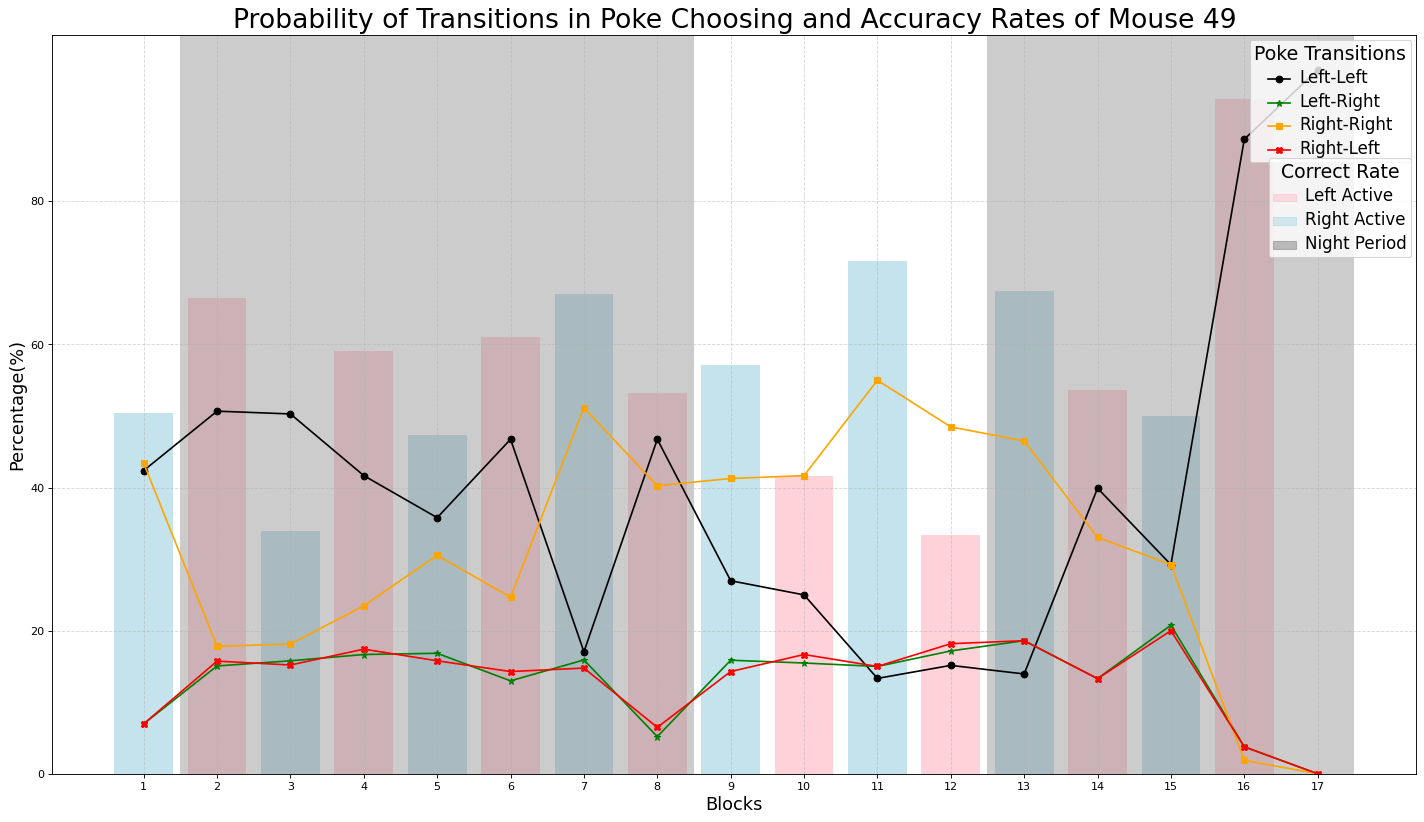

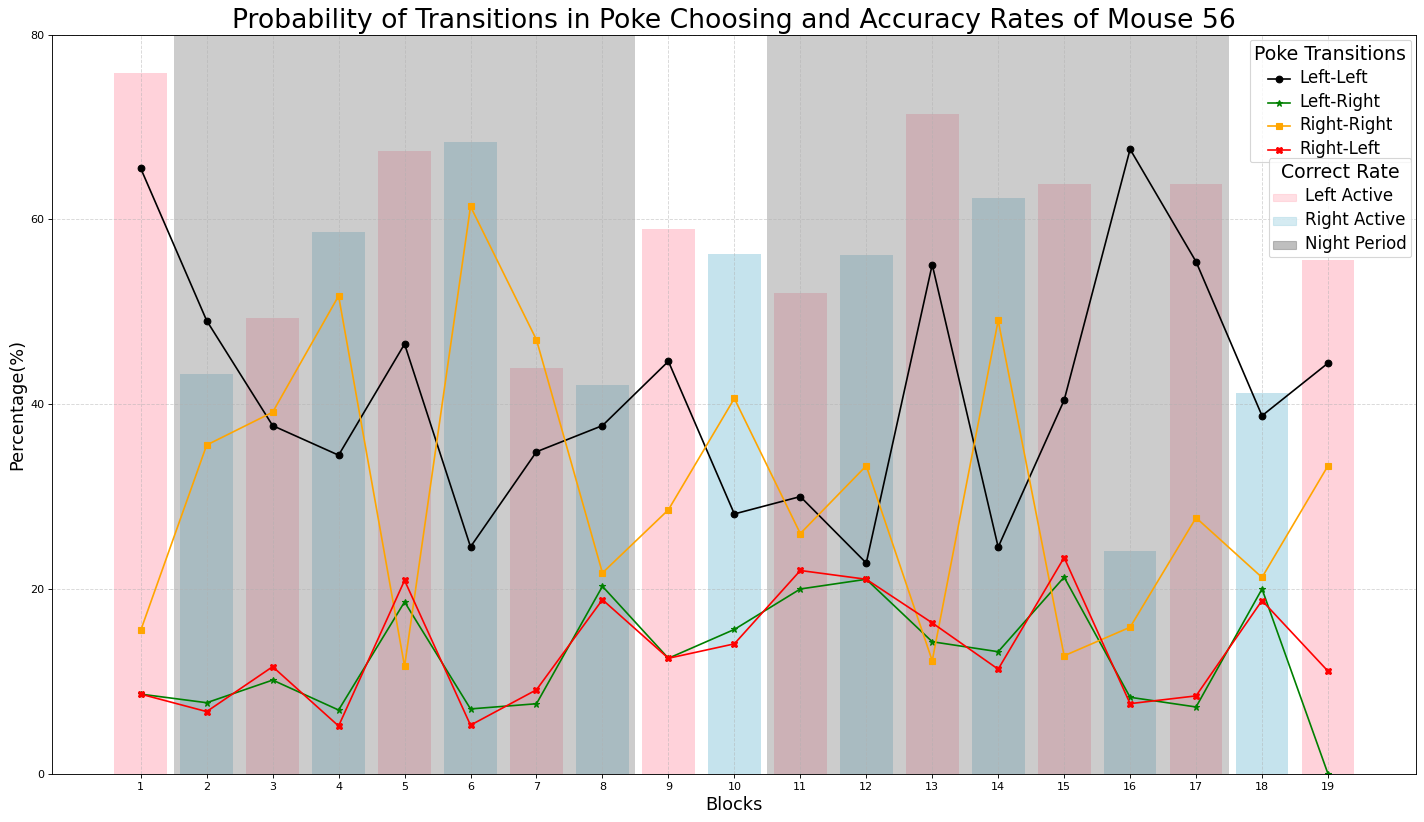

In [3]:
exp_scores = []

for path in paths.reversal_ivsa_exp:
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_tranition_stats(data_stats, blocks, path)
    acc, grad = dit.block_cumulative_acc(blocks, normalize=True, grad=True)
    exp_scores.append(sum(grad))

In [4]:
ctrl_scores, exp_scores

([-0.11083349293959921,
  0.08516666666666667,
  0.04946018602377772,
  -0.10096314526175065,
  -0.07734680377653497,
  -0.003248100335478954],
 [-0.10560810058974068,
  0.008654074987559768,
  -0.12906846240179576,
  -0.10067922874671348,
  -0.15596613457976888,
  -0.04163430420711978,
  -0.15093387905689748])

In [6]:
import intervals as invs

invs.perform_T_test(ctrl_scores, exp_scores, test_side='less')

P Value is  0.05206210962392159
There is no significant difference between the two groups.
